In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Dados de treinamento das máquinas
# Velocidade de Operação, Complexidade da Tarefa, Manutenção Necessária
velocidade = np.array([10, 5, 8, 6, 12, 4])
complexidade = np.array([1, 3, 2, 3, 1, 3])  # 1=Baixa, 2=Média, 3=Alta
manutencao = np.array([1, 3, 2, 3, 1, 2])    # 1=Baixa, 2=Média, 3=Alta

In [15]:
# Classes de saída (classificação)
classificacao = np.array(['Montagem', 'Teste', 'Montagem', 'Teste', 'Montagem', 'Teste'])

In [16]:
# Preparar os dados - combinar as features em uma matriz
X = np.column_stack((velocidade, complexidade, manutencao))
y = classificacao

print("=" * 60)
print("CLASSIFICAÇÃO DE MÁQUINAS - ÁRVORE DE DECISÃO")
print("=" * 60)
print("\nDados das máquinas:")
print("-" * 60)
for i in range(len(X)):
    print(f"Máquina {i+1}: Velocidade={X[i][0]}, Complexidade={X[i][1]}, Manutenção={X[i][2]} → {y[i]}")

CLASSIFICAÇÃO DE MÁQUINAS - ÁRVORE DE DECISÃO

Dados das máquinas:
------------------------------------------------------------
Máquina 1: Velocidade=10, Complexidade=1, Manutenção=1 → Montagem
Máquina 2: Velocidade=5, Complexidade=3, Manutenção=3 → Teste
Máquina 3: Velocidade=8, Complexidade=2, Manutenção=2 → Montagem
Máquina 4: Velocidade=6, Complexidade=3, Manutenção=3 → Teste
Máquina 5: Velocidade=12, Complexidade=1, Manutenção=1 → Montagem
Máquina 6: Velocidade=4, Complexidade=3, Manutenção=2 → Teste


In [17]:
# Dividir dados em treino e teste (80% treino, 20% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n📊 Divisão dos dados:")
print(f"   - Dados de treino: {len(X_treino)} máquinas")
print(f"   - Dados de teste: {len(X_teste)} máquinas")


📊 Divisão dos dados:
   - Dados de treino: 4 máquinas
   - Dados de teste: 2 máquinas


In [18]:
# Criar e treinar o modelo de árvore de decisão
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_treino, y_treino)

print("\n✓ Modelo treinado com sucesso!")


✓ Modelo treinado com sucesso!


In [19]:
# Fazer previsões
previsoes = modelo.predict(X_teste)

In [20]:
# Calcular acurácia
acuracia = accuracy_score(y_teste, previsoes)

print("\n" + "=" * 60)
print("RESULTADOS DA CLASSIFICAÇÃO")
print("=" * 60)
print(f"\n📈 Acurácia do modelo: {acuracia*100:.2f}%")

print("\n🔍 Previsões vs Valores Reais:")
print("-" * 60)
for i, (real, prev) in enumerate(zip(y_teste, previsoes)):
    status = "✓" if real == prev else "✗"
    print(f"   Teste {i+1}: Real = {real:10s} | Previsto = {prev:10s} {status}")


RESULTADOS DA CLASSIFICAÇÃO

📈 Acurácia do modelo: 100.00%

🔍 Previsões vs Valores Reais:
------------------------------------------------------------
   Teste 1: Real = Montagem   | Previsto = Montagem   ✓
   Teste 2: Real = Teste      | Previsto = Teste      ✓


In [21]:
# Exemplo de nova previsão
print("\n" + "=" * 60)
print("TESTE COM NOVA MÁQUINA")
print("=" * 60)
nova_maquina = np.array([[7, 2, 2]])  # Velocidade=7, Complexidade=Média, Manutenção=Média
previsao_nova = modelo.predict(nova_maquina)
print(f"\n🔧 Nova máquina:")
print(f"   - Velocidade: 7")
print(f"   - Complexidade: Média (2)")
print(f"   - Manutenção: Média (2)")
print(f"   → Classificação prevista: {previsao_nova[0]}")


TESTE COM NOVA MÁQUINA

🔧 Nova máquina:
   - Velocidade: 7
   - Complexidade: Média (2)
   - Manutenção: Média (2)
   → Classificação prevista: Montagem



📊 Gerando visualizações...


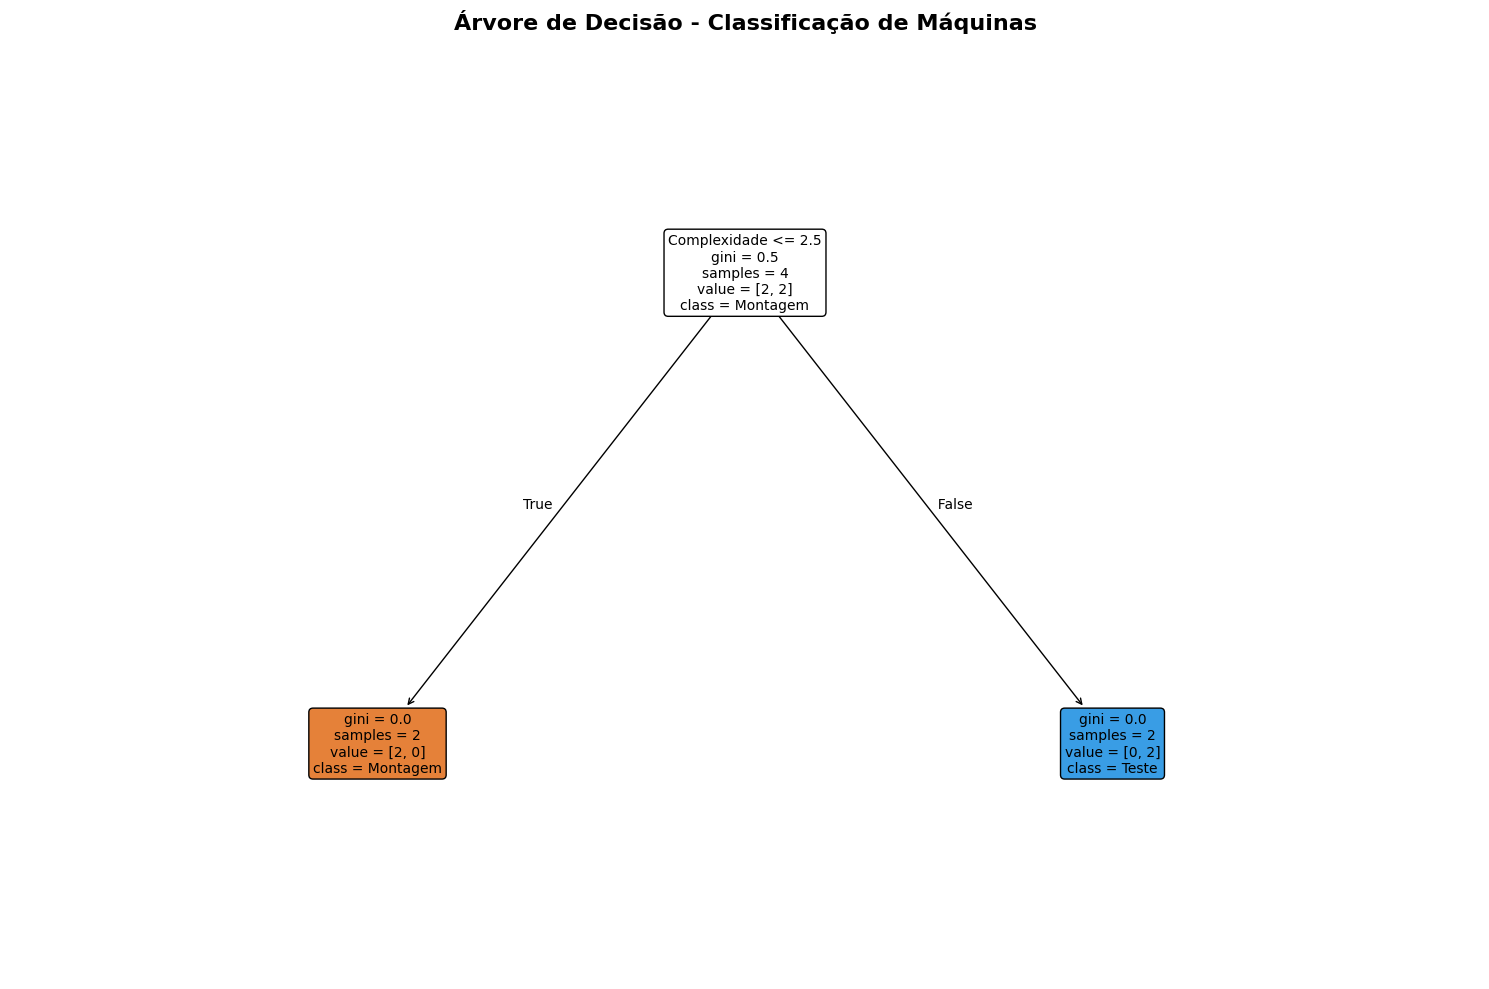

In [22]:
# Visualização 1: Árvore de Decisão
print("\n📊 Gerando visualizações...")
plt.figure(figsize=(15, 10))
tree.plot_tree(modelo, 
               feature_names=['Velocidade', 'Complexidade', 'Manutenção'],
               class_names=['Montagem', 'Teste'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Árvore de Decisão - Classificação de Máquinas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_31264\750082641.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=velocidade, palette='Set2')


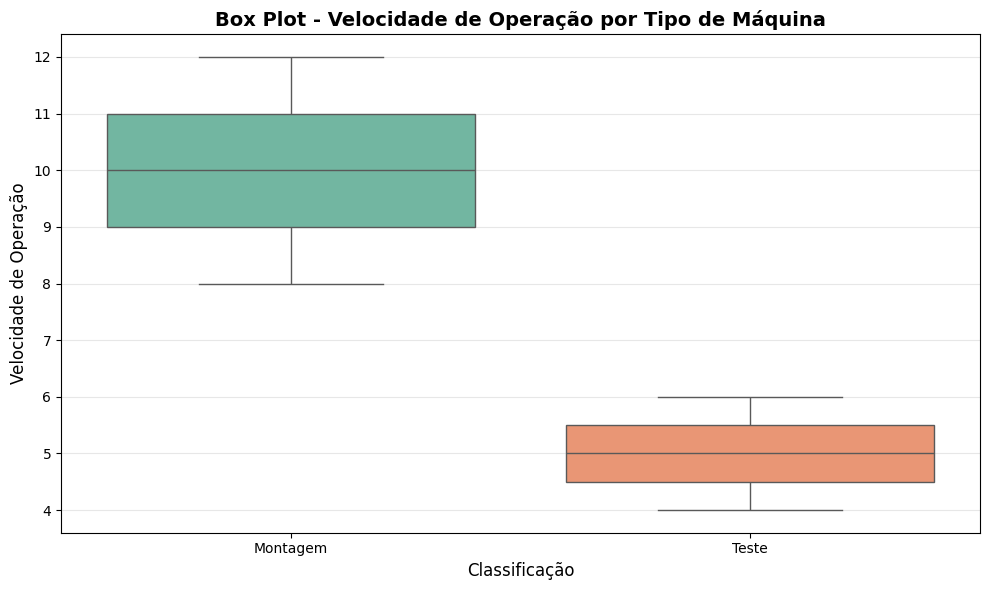

In [23]:
# Visualização 2: Box Plot da Velocidade por Classificação
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=velocidade, palette='Set2')
plt.title('Box Plot - Velocidade de Operação por Tipo de Máquina', fontsize=14, fontweight='bold')
plt.xlabel('Classificação', fontsize=12)
plt.ylabel('Velocidade de Operação', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_31264\714363822.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=velocidade, palette='viridis', errorbar=None)


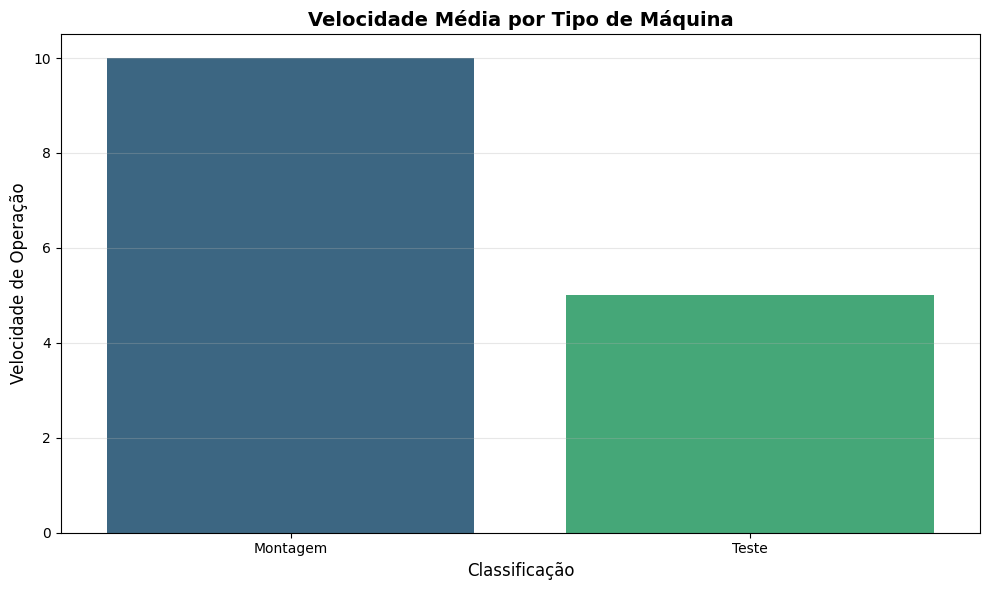


✓ ANÁLISE CONCLUÍDA!


In [24]:
# Visualização 3: Gráfico de Barras
plt.figure(figsize=(10, 6))
sns.barplot(x=y, y=velocidade, palette='viridis', errorbar=None)
plt.title('Velocidade Média por Tipo de Máquina', fontsize=14, fontweight='bold')
plt.xlabel('Classificação', fontsize=12)
plt.ylabel('Velocidade de Operação', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("✓ ANÁLISE CONCLUÍDA!")
print("=" * 60)